In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn import metrics

In [ ]:
datatrain=pd.read_csv(r'data train numerik no box 20 k5 91.csv')
datatrain.head

<bound method NDFrame.head of      JENIS_KAPAL  DERMAGA  PALKA   BD  SHIFTING  WAG  BAD_WEATHER  JUMLAH_CC  \
0              0        3     22  182       158    0            0          4   
1              1        3     23   40        21    0          235          3   
2              0        4     40   13       233    0           44          4   
3              1        4     13   12        65    0            0          2   
4              0        4     27  371       362    0            0          4   
..           ...      ...    ...  ...       ...  ...          ...        ...   
131            1        4     26   88       277    0          203          3   
132            1        3     18    1         3    0            0          3   
133            1        2     16  180        73    0            0          2   
134            1        3     19   53        19    0          132          3   
135            1        3     42  215       341    0            0          4   

     DISC

In [ ]:
datatrain.groupby('DELAY').size()

DELAY
0    84
1     7
2    28
dtype: int64

In [ ]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   JENIS_KAPAL  136 non-null    int64
 1   DERMAGA      136 non-null    int64
 2   PALKA        136 non-null    int64
 3   BD           136 non-null    int64
 4   SHIFTING     136 non-null    int64
 5   WAG          136 non-null    int64
 6   BAD_WEATHER  136 non-null    int64
 7   JUMLAH_CC    136 non-null    int64
 8   DISCHARGE    136 non-null    int64
 9   LOADING      136 non-null    int64
 10  DELAY        136 non-null    int64
dtypes: int64(11)
memory usage: 11.8 KB


In [ ]:
datatrain["DERMAGA"]=datatrain["DERMAGA"].astype('category')
datatrain["JENIS_KAPAL"]=datatrain["JENIS_KAPAL"].astype('category')
datatrain["DELAY"]=datatrain["DELAY"].astype('category')
datatrain["PALKA"]=datatrain["PALKA"].astype('int')
datatrain["BD"]=datatrain["BD"].astype('int')
datatrain["SHIFTING"]=datatrain["SHIFTING"].astype('int')
datatrain["WAG"]=datatrain["WAG"].astype('int')
datatrain["BAD_WEATHER"]=datatrain["BAD_WEATHER"].astype('int')
datatrain["JUMLAH_CC"]=datatrain["JUMLAH_CC"].astype('int')
datatrain["DISCHARGE"]=datatrain["DISCHARGE"].astype('int')
datatrain["LOADING"]=datatrain["LOADING"].astype('int')

In [ ]:
datatrain.isnull().any()

JENIS_KAPAL    False
DERMAGA        False
PALKA          False
BD             False
SHIFTING       False
WAG            False
BAD_WEATHER    False
JUMLAH_CC      False
DISCHARGE      False
LOADING        False
DELAY          False
dtype: bool

In [ ]:
arr = datatrain.values
X_train = arr[:, 0:10]
Y_train = arr[:, 10]

In [ ]:
X_train

array([[   1,    1,    8, ...,    3,  244,  454],
       [   0,    4,   24, ...,    3, 1047, 1012],
       [   1,    3,   42, ...,    4, 1275, 1352],
       ...,
       [   0,    3,   22, ...,    4, 1254,  886],
       [   1,    4,   13, ...,    2,  253,  432],
       [   1,    1,   10, ...,    2,  260,  363]])

In [ ]:
datatest=pd.read_csv(r'data test numerik no box 20 k5 91.csv')
datatest.head

<bound method NDFrame.head of     JENIS_KAPAL  DERMAGA  PALKA   BD  SHIFTING   WAG  BAD_WEATHER  JUMLAH_CC  \
0             0        4     29   28       230     0          141          3   
1             1        4     11   16       178     0           35          2   
2             1        2     13   63       143   111            0          2   
3             0        1      5    0        35     0            0          2   
4             1        1      9   47       160   231          102          2   
5             1        3     29  192       361     0            0          3   
6             1        4     29  273       215   126            0          3   
7             1        4     29  118       227     0            0          3   
8             1        2     11   82        46     0            5          2   
9             1        4     11    0        43     0            0          2   
10            1        4     29   54       249  1515            0          4   
11        

In [ ]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   JENIS_KAPAL  35 non-null     int64
 1   DERMAGA      35 non-null     int64
 2   PALKA        35 non-null     int64
 3   BD           35 non-null     int64
 4   SHIFTING     35 non-null     int64
 5   WAG          35 non-null     int64
 6   BAD_WEATHER  35 non-null     int64
 7   JUMLAH_CC    35 non-null     int64
 8   DISCHARGE    35 non-null     int64
 9   LOADING      35 non-null     int64
 10  DELAY        35 non-null     int64
dtypes: int64(11)
memory usage: 3.1 KB


In [ ]:
datatest["DERMAGA"]=datatest["DERMAGA"].astype('category')
datatest["JENIS_KAPAL"]=datatest["JENIS_KAPAL"].astype('category')
datatest["DELAY"]=datatest["DELAY"].astype('category')
datatest["PALKA"]=datatest["PALKA"].astype('int')
datatest["BD"]=datatest["BD"].astype('int')
datatest["SHIFTING"]=datatest["SHIFTING"].astype('int')
datatest["WAG"]=datatest["WAG"].astype('int')
datatest["BAD_WEATHER"]=datatest["BAD_WEATHER"].astype('int')
datatest["JUMLAH_CC"]=datatest["JUMLAH_CC"].astype('int')
datatest["DISCHARGE"]=datatest["DISCHARGE"].astype('int')
datatest["LOADING"]=datatest["LOADING"].astype('int')

In [ ]:
datatest.isnull().any()

JENIS_KAPAL    False
DERMAGA        False
PALKA          False
BD             False
SHIFTING       False
WAG            False
BAD_WEATHER    False
JUMLAH_CC      False
DISCHARGE      False
LOADING        False
DELAY          False
dtype: bool

In [ ]:
datatest.groupby('DELAY').size()

DELAY
0    13
1     1
2     4
dtype: int64

In [ ]:
arr = datatest.values
X_test = arr[:, 0:10]
Y_test = arr[:, 10]

In [ ]:
Y_test

array([0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0])

**K=2**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_PredKNN=knn.predict(X_test)
accuracy_score(Y_test, Y_PredKNN)

# Evaluate
print(metrics.confusion_matrix(Y_test, Y_PredKNN))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_PredKNN, digits=3))

[[30  0  0]
 [ 1  1  0]
 [ 2  0  1]]
              precision    recall  f1-score   support

           0      0.909     1.000     0.952        30
           1      1.000     0.500     0.667         2
           2      1.000     0.333     0.500         3

    accuracy                          0.914        35
   macro avg      0.970     0.611     0.706        35
weighted avg      0.922     0.914     0.897        35



**K=5**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_PredKNN=knn.predict(X_test)
accuracy_score(Y_test, Y_PredKNN)

# Evaluate
print(metrics.confusion_matrix(Y_test, Y_PredKNN))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_PredKNN, digits=3))

[[30  0  0]
 [ 1  1  0]
 [ 2  0  1]]
              precision    recall  f1-score   support

           0      0.909     1.000     0.952        30
           1      1.000     0.500     0.667         2
           2      1.000     0.333     0.500         3

    accuracy                          0.914        35
   macro avg      0.970     0.611     0.706        35
weighted avg      0.922     0.914     0.897        35



**K=14**

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,Y_train)
Y_PredKNN=knn.predict(X_test)
accuracy_score(Y_test, Y_PredKNN)

# Evaluate
print(metrics.confusion_matrix(Y_test, Y_PredKNN))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_PredKNN, digits=3))

[[30  0  0]
 [ 1  0  1]
 [ 1  0  2]]
              precision    recall  f1-score   support

           0      0.938     1.000     0.968        30
           1      0.000     0.000     0.000         2
           2      0.667     0.667     0.667         3

    accuracy                          0.914        35
   macro avg      0.535     0.556     0.545        35
weighted avg      0.861     0.914     0.887        35



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm=confusion_matrix(Y_test, Y_PredKNN)
cm

array([[30,  0,  0],
       [ 1,  1,  0],
       [ 2,  0,  1]])

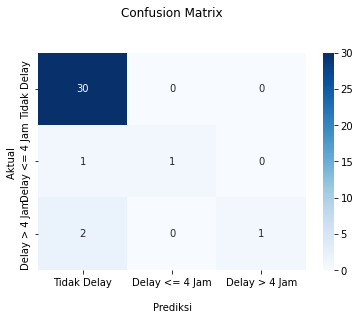

In [ ]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPrediksi')
ax.set_ylabel('Aktual ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Tidak Delay','Delay <= 4 Jam', 'Delay > 4 Jam'])
ax.yaxis.set_ticklabels(['Tidak Delay','Delay <= 4 Jam', 'Delay > 4 Jam'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
classes = {0:'Tidak Delay',1:'Delay <= 4 jam',2:'Delay > 4 Jam'}
class_labels = list(classes.values())
ax = sns.barplot(knn.predict_proba(X_test), class_labels, palette="winter", orient='h')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error rata-rata')

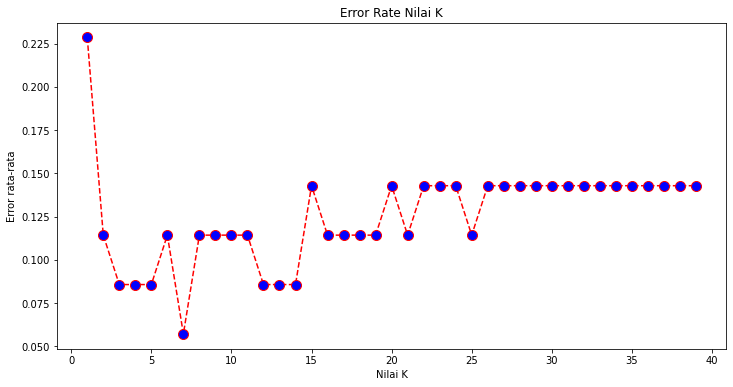

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Error rata-rata')

In [ ]:

    st.write("The predicted class is ",result)
    Y_PredKNN = [np.round(x,2) for x in Y_PredKNN]
    ax = sns.barplot(Y_PredKNN ,class_labels, palette="winter", orient='h')
    ax.set_yticklabels(class_labels,rotation=0)
    plt.title("Probabilities of the Data belonging to each class")
    for index, value in enumerate(probs):
        plt.text(value, index,str(value))

**KNN DATA TRAIN CEK OVER FITTING**

In [ ]:
#KNN train
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_PredKNN=knn.predict(X_train)
accuracy_score(Y_train, Y_PredKNN)

# Evaluate
print(metrics.confusion_matrix(Y_train, Y_PredKNN))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_train, Y_PredKNN, digits=3))

[[96  0  1]
 [ 4  0  2]
 [24  0  9]]
              precision    recall  f1-score   support

           0      0.774     0.990     0.869        97
           1      0.000     0.000     0.000         6
           2      0.750     0.273     0.400        33

    accuracy                          0.772       136
   macro avg      0.508     0.421     0.423       136
weighted avg      0.734     0.772     0.717       136



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
knn.predict_proba(X_test)

array([[0.2, 0.2, 0.6],
       [0.8, 0. , 0.2],
       [1. , 0. , 0. ],
       [0.8, 0. , 0.2],
       [1. , 0. , 0. ],
       [0.8, 0. , 0.2],
       [0.6, 0. , 0.4],
       [0.8, 0. , 0.2],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.4, 0.2, 0.4],
       [1. , 0. , 0. ],
       [0.6, 0.2, 0.2],
       [0.6, 0. , 0.4],
       [0.6, 0. , 0.4],
       [0.6, 0. , 0.4],
       [0.8, 0.2, 0. ],
       [1. , 0. , 0. ],
       [0.8, 0.2, 0. ],
       [0.8, 0. , 0.2],
       [0.8, 0. , 0.2],
       [0.8, 0. , 0.2],
       [1. , 0. , 0. ],
       [0.2, 0.4, 0.4],
       [0.8, 0. , 0.2],
       [0.8, 0.2, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.8, 0.2, 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.8, 0. , 0.2],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0.6, 0. , 0.4]])

PREDIKSI DATA BARU

In [ ]:
df = pd.DataFrame(data={"DERMAGA": [3], "JENIS_KAPAL" : [1], "BD" : [11], "PALKA" : [27], "SHIFTING_YARD" : [295],
                        "WAG" : [0], "BAD_WEATHER" : [398], "JUMLAH_CC" : [3], "DISCHARGE" : [1418], "LOADING" : [1020]})

In [ ]:
new=df.values
X = new[:, 0:10]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   DERMAGA        1 non-null      int64
 1   JENIS_KAPAL    1 non-null      int64
 2   BD             1 non-null      int64
 3   PALKA          1 non-null      int64
 4   SHIFTING_YARD  1 non-null      int64
 5   WAG            1 non-null      int64
 6   BAD_WEATHER    1 non-null      int64
 7   JUMLAH_CC      1 non-null      int64
 8   DISCHARGE      1 non-null      int64
 9   LOADING        1 non-null      int64
dtypes: int64(10)
memory usage: 208.0 bytes


In [ ]:
df["DERMAGA"]=df["DERMAGA"].astype('category')
df["JENIS_KAPAL"]=df["JENIS_KAPAL"].astype('category')

In [ ]:
hasil = knn.predict(X)
if hasil == 0:
  print ("Kapal Tidak Mengalami Delay Keberangkatan")
elif hasil == 1:
  print ("Kapal Delay < 4 Jam")
else:
  print ("Kapal Delay > 4 Jam")

Kapal Tidak Mengalami Delay Keberangkatan


In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

In [ ]:
# perform permutation importance
results = permutation_importance(knn.fit(X_train,Y_train), X_train,Y_train, scoring='accuracy')

In [ ]:
# get importance
importance = results.importances_mean
importance

array([0.        , 0.        , 0.        , 0.025     , 0.00441176,
       0.01617647, 0.00588235, 0.        , 0.09705882, 0.07205882])

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.02500
Feature: 4, Score: 0.00441
Feature: 5, Score: 0.01618
Feature: 6, Score: 0.00588
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.09706
Feature: 9, Score: 0.07206


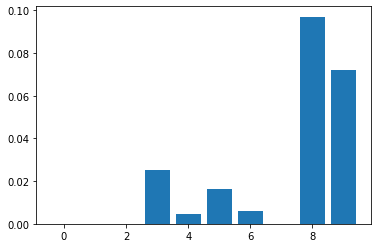

In [ ]:
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

**NBC**

In [ ]:
#NAIVE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model=GaussianNB()
model.fit(X_train, Y_train)
Y_pred=model.predict(X_test)
accuracy_score(Y_test, Y_pred)
# Evaluate
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=3))

[[39  1  3]
 [ 1  0  0]
 [ 5  1  2]]
              precision    recall  f1-score   support

           0      0.867     0.907     0.886        43
           1      0.000     0.000     0.000         1
           2      0.400     0.250     0.308         8

    accuracy                          0.788        52
   macro avg      0.422     0.386     0.398        52
weighted avg      0.778     0.788     0.780        52



# Bagian Baru

**NBC BAGGING**

In [ ]:
from pandas.core.common import random_state
from sklearn.ensemble import BaggingClassifier
h=BaggingClassifier(GaussianNB(),n_estimators = 10, max_features = 1, max_samples=0.5, random_state=0)

In [ ]:
#AKURASI BAGGING
h.fit(X_train,Y_train)
Y_pred=h.predict(X_test)
accuracy_score(Y_test, Y_pred)
# Evaluate
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=3))

[[43  0  0]
 [ 1  0  0]
 [ 8  0  0]]
              precision    recall  f1-score   support

           0      0.827     1.000     0.905        43
           1      0.000     0.000     0.000         1
           2      0.000     0.000     0.000         8

    accuracy                          0.827        52
   macro avg      0.276     0.333     0.302        52
weighted avg      0.684     0.827     0.749        52



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
